In [ ]:
import os
os.environ['IPYTHON_SUPPRESS_DEPRECATED_CONFIGS'] = '1'
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

import time


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Update the route to access the data:
route = '/content/drive/Shared drives/Capstone/Dataset_cleaned_merged/df_final_version.csv'


In [ ]:
# Path to the CSV file
file_path = route

# Read the CSV file into a DataFrame
orders = pd.read_csv(file_path)

orders.head(5)

,id_orden,id_producto,incluido_orden_carrito,reordenado,nombre_producto,id_pasillo,id_departamento,pasillo,departamento,incluido_orden_carrito_normalized,pasillo_encoded,departamento_encoded,pasillo_ACCESORIOS PARA BEBÉS,pasillo_ACEITES VINAGRES,pasillo_ACEITUNAS ENCURTIDAS BIENES,pasillo_ADEREZOS PARA ENSALADAS Y CONDIMENTOS,pasillo_ALERGIAS GRIPE,pasillo_ALIMENTOS DE LA INDIA,pasillo_ALIMENTOS INSTANTÁNEOS,pasillo_ALIMENTOS KOSHER,pasillo_ALIMENTOS LATINOS,pasillo_ALIVIO DEL DOLOR,pasillo_ALMACENAMIENTO DE ALIMENTOS,pasillo_ALTERNATIVAS DE CARNE TOFU,pasillo_AMBIENTADORES Y VELAS,pasillo_APERITIVOS CONGELADOS,pasillo_ARROCES Y OTROS,pasillo_ARTÍCULOS DE PAPEL,pasillo_AVES DE CORRAL,pasillo_AVES DE CORRAL ENVASADAS,pasillo_BARRAS DE GRANOLA DE ENERGÍA,pasillo_BEBIDAS DEPORTIVAS ENERGETICAS,pasillo_BEBIDAS ESPIRITUOSAS,pasillo_BEBIDAS SIN ALCOHOL,pasillo_BEBIDAS VEGETALES Y SIN LACTOSA,pasillo_BELLEZA,pasillo_BOCADILLOS FRUTAS VEGETALES,pasillo_BOLLOS ROLLOS,pasillo_BOLSAS DE BASURA REVESTIMIENTOS,pasillo_CAFÉ,pasillo_CARNE DE ALMUERZO,pasillo_CARNE ENVASADA,pasillo_CEREAL,pasillo_CERVEZAS REFRIGERADORES,pasillo_CHICLES Y OTROS DULCES,pasillo_CHIPS DE GALLETAS SALADAS,pasillo_COMIDA CONGELADA,pasillo_COMIDA PARA GATOS,pasillo_COMIDA PARA PERROS,pasillo_COMIDAS ASIÁTICAS,pasillo_COMIDAS ENLATADAS JUDÍAS,pasillo_COMIDAS PREPARADAS,pasillo_CONDIMENTOS,pasillo_CREMA,pasillo_CUBIERTAS PARA HELADOS,pasillo_CUIDADO DE OÍDO Y OJOS,pasillo_CUIDADO DEL CABELLO,pasillo_CUIDADO FACIAL,pasillo_CUIDADO FEMENINO,pasillo_DESAYUNOS CONGELADOS,pasillo_DESODORANTES,pasillo_DETERGENTES PARA PLATOS,pasillo_DIFERENCIALES,pasillo_DIGESTIÓN,pasillo_DULCES Y CHOCOLATES,pasillo_ENVASADOS ​​DE FRUTAS Y VEGETALES,pasillo_ESPECIALIDAD DE VINOS CAVAS,pasillo_ESPECIAS CONDIMENTOS,pasillo_FRUTA SEMILLAS FRUTOS SECOS,pasillo_FRUTAS FRESCAS,pasillo_FRUTOS SECOS A GRANEL FRUTAS VERDURAS,pasillo_FÓRMULA COMIDA DE BEBÉ,pasillo_GALLETAS,pasillo_GALLETAS PASTELES,pasillo_GRANOLA,pasillo_GRANOS A GRANEL,pasillo_HELADOS,pasillo_HIERBAS FRESCAS,pasillo_HIGIENE ORAL,pasillo_HUEVOS,pasillo_INGREDIENTES PARA HORNEAR,pasillo_JABÓN,pasillo_JUGO CONGELADO,pasillo_LAVANDERÍA,pasillo_LECHES,pasillo_LOCIONES DE JABÓN PARA EL CUERPO,pasillo_MANTECA,pasillo_MARISCOS,pasillo_MARISCOS CARNE CONGELADA,pasillo_MARISCOS CARNE ENLATADA,pasillo_MARISCOS ENVASADOS,pasillo_MEZCLA DE APERITIVOS MEZCLA DE FRUTOS SECOS,pasillo_MEZCLAS DE BEBIDAS DE CACAO,pasillo_MEZCLAS PARA TORTITAS DE CEREALES,pasillo_MIELES JARABES NÉCTARES,pasillo_MOSTRADOR DE CARNE,pasillo_MÁS HOGARES,pasillo_NECESIDADES DEL AFEITADO,pasillo_NÉCTARES DE JUGO,pasillo_OTROS,pasillo_OTROS QUESOS CREMAS,pasillo_PALOMITAS,pasillo_PAN DE MOLDE,pasillo_PAN Y TORTILLAS,pasillo_PANADERÍA DESAYUNO,pasillo_PANES MASAS CONGELADAS,pasillo_PASTA FRESCA,pasillo_PASTAS GELATINAS HORNEAR MEZCLAS,pasillo_PASTAS SECAS,pasillo_PASTELERÍA PARA DESAYUNO,pasillo_PAÑALES TOALLITAS,pasillo_PERROS CALIENTES TOCINO SALCHICHAS,pasillo_PIZZAS CONGELADAS,pasillo_PLACAS CUENCOS TAZAS CUBIERTOS,pasillo_POSTRE CONGELADO,pasillo_POSTRES DE PANADERÍA,pasillo_POSTRES REFRIGERADOS PUDÍN,pasillo_PREPARACIÓN DE LA CARNE MARINADOS,pasillo_PRIMEROS AUXILIOS,pasillo_PRODUCTOS CONGELADOS,pasillo_PRODUCTOS DE BAÑO PARA BEBÉ Y CUIDADO DEL CUERPO,pasillo_PRODUCTOS DE LIMPIEZA,pasillo_PRODUCTOS ENVASADOS,pasillo_PROTECCIÓN DE LA PIEL,pasillo_PURÉ DE MANZANA Y FRUTAS ENLATADAS,pasillo_QUESOS DE ESPECIALIDAD,pasillo_QUESOS ENVASADOS,pasillo_REFRIGERADOS,pasillo_SALSA PARA PASTA,pasillo_SALSAS EN CONSERVA PARA UNTAR,pasillo_SALSAS FRESCAS TAPENADES,pasillo_SELTZER AGUA Y AGUA CON GAS,pasillo_SIN CLASFICAR,pasillo_SOPAS PREPARADAS ENSALADAS,pasillo_SOPAS Y CALDOS,pasillo_SUMINISTROS PARA HORNEAR Y DECORACIÓN,pasillo_SUPLEMENTOS DE VITAMINAS,pasillo_SUSTITUTOS DE ALIMENTOS DE PROTEÍNAS,pasillo_TÉ,pasillo_UTENSILIOS DE COCINA,pasillo_VEGETALES FRESCOS,pasillo_VEGETARIANA VEGANA CONGELADA,pasillo_VERDURAS EN CONSERVA Y EN FRASCOS,pasillo_VINOS BLANCOS,pasillo_VINOS TINTOS

In [ ]:
orders['id_orden'].nunique()

131153

In [ ]:
orders['vector_words'] = orders['nombre_producto'] +' '+  orders['pasillo'] + ' ' + orders['departamento']

In [ ]:
# Agrupamos por 'id_order' y concatenamos los valores de 'vector_words'
grouped_orders = orders.groupby('id_orden')['vector_words'].apply(lambda x: '|'.join(x)).reset_index()

# Mostramos el resultado
print(grouped_orders)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#reduce the dataset for the sake of coding/performance

#orders_reduced = grouped_orders.head(1000)
#orders_reduced.head(5)

## OPEN AI

In [ ]:
pip install OpenAI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.5/327.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI

In [ ]:
client = OpenAI(api_key = "xxxxx") #api key de mati

In [ ]:
# Extract a list of product short descriptions from products
orders_products_list = grouped_orders['vector_words'].tolist()

In [ ]:
grouped_orders.head(5)

,id_orden,vector_words
0,1,EL YOGUR DE BULGARIA YOGUR HUEVOS Y LÁCTEOS|4%...
1,36,QUESO RALLADO PECORINO ROMANO QUESOS DE ESPECI...
2,38,SIN CÁSCARA PISTACHOS FRUTA SEMILLAS FRUTOS SE...
3,96,PAVO ASADO CARNE DE ALMUERZO FIAMBRES|PEPINO O...
4,98,AGUA NATURAL DE MANANTIAL SELTZER AGUA Y AGUA ...


15:25

In [ ]:
import time


# Initialize an empty list to hold all embeddings
all_embeddings = []

# Process in batches
batch_size = 1000

# Validate the input data
if not all(isinstance(item, str) for item in grouped_orders['vector_words']):
    raise ValueError("All items in 'vector_words' must be strings.")

for i in range(0, len(grouped_orders), batch_size):
    batch_input = grouped_orders['vector_words'][i:i+batch_size]

    try:
        # Make API call for the current batch
        response = client.embeddings.create(model="text-embedding-ada-002", input=batch_input)

        # Convert response to dictionary
        response_dict = response.model_dump()

        # Extract embeddings for the current batch
        batch_embeddings = [item['embedding'] for item in response_dict['data']]

        # Append the batch embeddings to the all_embeddings list
        all_embeddings.extend(batch_embeddings)
    except Exception as e:
        print(f"An error occurred: {e}")
        time.sleep(62)  # Sleep before retrying

    # API rate limit handling
    time.sleep(62)

print("Embeddings generation completed.")

################

# Check if the length of embeddings matches the length of grouped_orders
if len(all_embeddings) == len(grouped_orders):
    # Add embeddings to the DataFrame
    grouped_orders['embedding'] = all_embeddings
else:
    print(f"Length mismatch: {len(all_embeddings)} embeddings vs {len(grouped_orders)} orders")


###########


# save the embeddings dataframe as a different '.csv'

path = '/content/drive/Shared drives/Capstone/Notebooks/OpenAI Embeddings/orders_embbedings.csv'

grouped_orders.to_csv(path, index=False)

print('File saved successfully.')


Embeddings generation completed.
File saved successfully.


In [ ]:
ordenes_unicas_embeddings = grouped_orders['id_orden'].nunique()
print('La cantidad de ordenes unicas con embeddings es: ', ordenes_unicas_embeddings)

La cantidad de ordenes unicas con embeddings es:  131153


## similaridad del coseno

In [ ]:

embeddings_matrix = np.stack(orders_reduced['embedding'].values)

# Calcula la matriz de similaridad de coseno
cosine_similarities = cosine_similarity(embeddings_matrix)

print("Matriz de similaridad de coseno:")
print(cosine_similarities)

Matriz de similaridad de coseno:
[[1.         0.90551628 0.85894251 ... 0.87442183 0.83662249 0.8624448 ]
 [0.90551628 1.         0.84693913 ... 0.9015278  0.86926382 0.84845332]
 [0.85894251 0.84693913 1.         ... 0.84989513 0.85327483 0.85543631]
 ...
 [0.87442183 0.9015278  0.84989513 ... 1.         0.86426215 0.86598785]
 [0.83662249 0.86926382 0.85327483 ... 0.86426215 1.         0.83771616]
 [0.8624448  0.84845332 0.85543631 ... 0.86598785 0.83771616 1.        ]]


In [ ]:
def find_similar_order(cosine_similarities, doc_index):
    # Excluir de la similaridad el mismo documento
    similitudes = cosine_similarities[doc_index]
    similitudes[doc_index] = -1  # Ignorar la similaridad consigo mismo

    # Encontrar el índice de la mayor similaridad
    index_max_similitud = np.argmax(similitudes)
    return index_max_similitud, similitudes[index_max_similitud]

# Ejemplo de uso para encontrar la orden más similar a la orden en el índice 0
doc_index = 14
similar_order_index, similarity_score = find_similar_order(cosine_similarities, doc_index)
print(f"La orden más similar a la orden {doc_index} es la orden {similar_order_index} con una similaridad de {similarity_score}")


La orden más similar a la orden 14 es la orden 102 con una similaridad de 0.8757854407891673


In [ ]:
# Crear un nuevo DataFrame con el índice y la columna 'nombre_producto'
orders_reduced_with_index = orders_reduced.reset_index()[['index', 'id_orden']]
print(orders_reduced_with_index)


     index  id_orden
0        0         1
1        1        36
2        2        38
3        3        96
4        4        98
5        5       112
6        6       170
7        7       218
8        8       226
9        9       349
10      10       393
11      11       456
12      12       473
13      13       631
14      14       719
15      15       762
16      16       774
17      17       844
18      18       878
19      19       904
20      20       915
21      21       988
22      22      1001
23      23      1032
24      24      1042
25      25      1077
26      26      1086
27      27      1119
28      28      1120
29      29      1139
30      30      1143
31      31      1145
32      32      1275
33      33      1280
34      34      1318
35      35      1325
36      36      1335
37      37      1342
38      38      1350
39      39      1468
40      40      1571
41      41      1572
42      42      1579
43      43      1591
44      44      1597
45      45      1620
46      46   

In [ ]:
# Example: Find the most similar order through the index

doc_index = 978 # aca hay que poner el index que queremos identificar con el similar

index_mas_similar, similitud = find_similar_order(cosine_similarities, doc_index)
item_similarity_input = orders_reduced_with_index['id_orden'].iloc[doc_index]
item_similarity_output = orders_reduced_with_index['id_orden'].iloc[index_mas_similar]
print(f'The order most similar to the order {item_similarity_input} is the order {item_similarity_output} with a similarity of {similitud}')

The order most similar to the order 25115 is the order 7615 with a similarity of 0.9347620498541865


In [ ]:
# Filtrar los nombres de los productos para cada ID de orden
productos_input = orders['nombre_producto'][orders['id_orden'] == item_similarity_input]
productos_output = orders['nombre_producto'][orders['id_orden'] == item_similarity_output]

# Encontrar los productos que están en la salida pero no en la entrada
productos_exclusivos_output = productos_output[~productos_output.isin(productos_input)]

# Desplegar los nombres de los productos exclusivos de la orden de salida
productos_exclusivos_output

3126                                 COCA-COLA LIGHT SODA
3127                                         LECHE ENTERA
3128                     TRIPLE PARTIDO DE PIZZA DE CARNE
3129    QUESO RALLADO BAJA HUMEDAD MOZZARELLA PARCIALM...
3130          LA FEROZ DE SERIE G DE UVA BEBIDA DEPORTIVA
3131                          STEAMFRESH SÚPER MAÍZ DULCE
3132                         STEAMFRESH GUISANTES DE OLOR
3133                  ACRISTALAMIENTO BUÑUELOS DE MANZANA
3134                       STEAMFRESH FRIJOLES VERDES CUT
3135                                       PRIMA DE HIELO
3136                              CONSERVA DE ALBARICOQUE
3137                                      SETAS REBANADAS
3138                      PRIMA ORIGINAL GALLETAS SALADAS
3139    4 ORIGINAL CARNE DE SALCHICHA, PEPPERONI, HAMB...
3140                      SIN AZÚCAR DE LECHE DE ANACARDO
Name: nombre_producto, dtype: object

In [ ]:
data = []

for doc_index in range(1, 999):
    index_mas_similar, similitud = find_similar_order(cosine_similarities, doc_index)
    order_similarity_input = orders_reduced_with_index['id_orden'].iloc[doc_index]
    order_similarity_output = orders_reduced_with_index['id_orden'].iloc[index_mas_similar]
    data.append({
        'doc_index': doc_index,
        'order_similarity_input': order_similarity_input,
        'order_similarity_output': order_similarity_output,
        'similitud': similitud
    })

# Crear el DataFrame
df = pd.DataFrame(data)

In [ ]:
df.sort_values(by = 'similitud', ascending = False)

,doc_index,order_similarity_input,order_similarity_output,similitud
341,342,8564,3227,1.000000
97,98,3227,8564,1.000000
396,397,10287,8616,1.000000
344,345,8616,10287,1.000000
92,93,3176,20569,1.000000
806,807,20569,3176,1.000000
779,780,20079,25162,0.999998
978,979,25162,20079,0.999998
407,408,10626,17205,0.991259
655,656,17205,10626,0.991259


In [ ]:
df[df['order_similarity_input'] == 7925]

,doc_index,order_similarity_input,order_similarity_output,similitud
322,323,7925,9534,0.949593


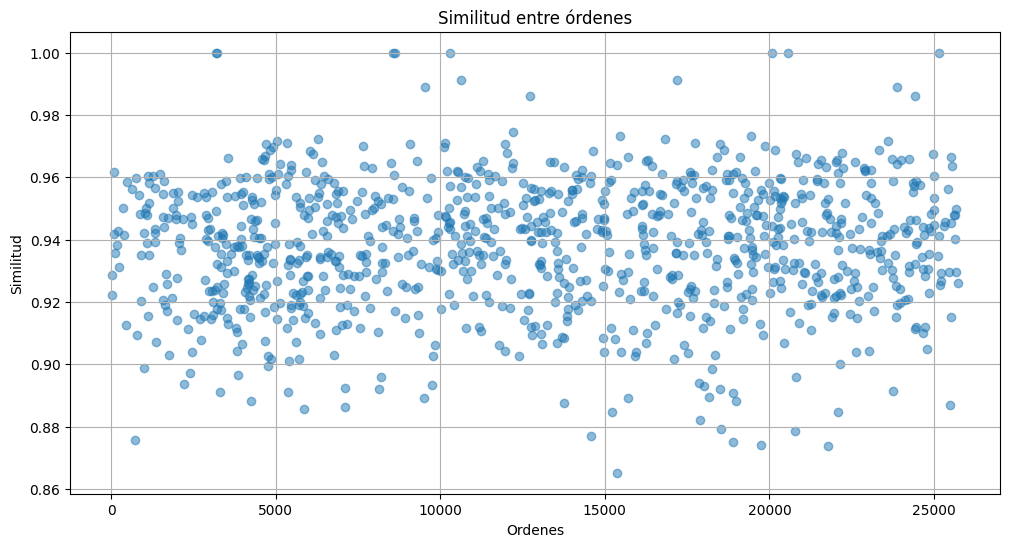

In [ ]:
# Graficar
plt.figure(figsize=(12, 6))
plt.scatter(df['item_similarity_input'], df['similitud'], alpha=0.5)
plt.xlabel('Ordenes')
plt.ylabel('Similitud')
plt.title('Similitud entre órdenes')
plt.grid(True)
plt.show()